# 1. Package 및 Data Load

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
df = pd.read_csv('./examples/example_wp_peyton_manning.csv')

In [5]:
df.count()

ds    2905
y     2905
dtype: int64

In [6]:
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


# 2. 데이터 정리

## 2-1. y 값을 log y로 변경

In [7]:
df['y'] = np.log(df['y'])

In [8]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [9]:
df.tail()

,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


# 3. Fit

In [10]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


# 4. Make future Times

In [11]:
future = m.make_future_dataframe(periods=365)

In [14]:
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [12]:
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


# 5. Predict

In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208171,7.509848,8.972658
3266,2017-01-16,8.533159,7.786190,9.247971
3267,2017-01-17,8.320549,7.593722,9.059035
3268,2017-01-18,8.153184,7.384417,8.866274
3269,2017-01-19,8.165106,7.421057,8.866282


In [19]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.044384,8.044384,8.044384,8.202264,9.479273,0.802842,0.802842,0.802842,0.802842,0.802842,0.802842,0.352313,0.352313,0.352313,0.450529,0.450529,0.450529,8.847226
1,2007-12-11,8.042831,8.042831,8.042831,7.910656,9.233488,0.552870,0.552870,0.552870,0.552870,0.552870,0.552870,0.119648,0.119648,0.119648,0.433223,0.433223,0.433223,8.595701
2,2007-12-12,8.041278,8.041278,8.041278,7.771597,9.056284,0.350178,0.350178,0.350178,0.350178,0.350178,0.350178,-0.066673,-0.066673,-0.066673,0.416851,0.416851,0.416851,8.391457
3,2007-12-13,8.039726,8.039726,8.039726,7.719364,8.956683,0.329616,0.329616,0.329616,0.329616,0.329616,0.329616,-0.072244,-0.072244,-0.072244,0.401860,0.401860,0.401860,8.369342
4,2007-12-14,8.038173,8.038173,8.038173,7.629599,8.964102,0.319068,0.319068,0.319068,0.319068,0.319068,0.319068,-0.069588,-0.069588,-0.069588,0.388656,0.388656,0.388656,8.357241


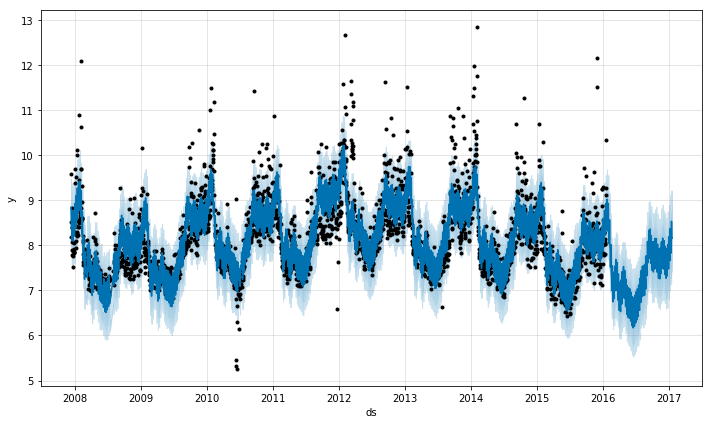

In [20]:
m.plot(forecast)

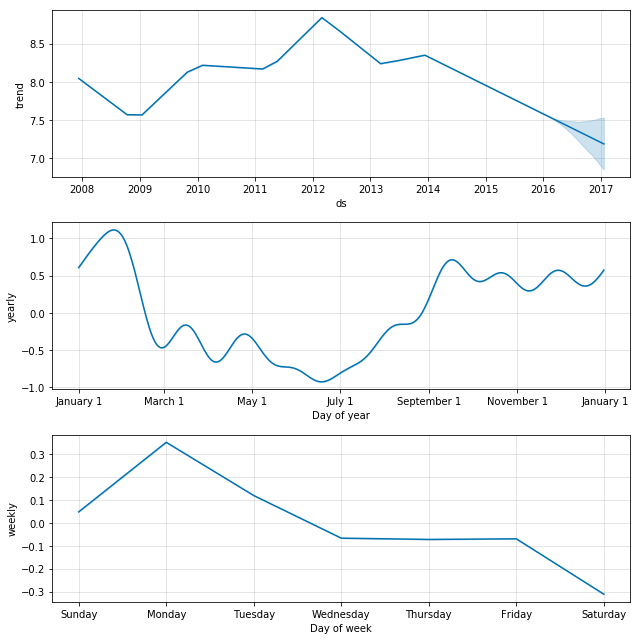

In [21]:
m.plot_components(forecast)

In [22]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first 80 percent of the history.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  weekly_seasonality: Fit weekly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  daily_seasonality: Fit daily seasonality.
 |      Can be 'auto', True, False, o